In [1]:
# import mediapipe as mp
# import cv2
# import numpy as np
# import uuid
# import os

In [2]:
# mp_drawing = mp.solutions.drawing_utils
# mp_hands = mp.solutions.hands

In [4]:
# mp_drawing.DrawingSpec??

In [5]:
# os.mkdir('Output Images')

In [7]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install visualkeras pydot pydotplus graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


import warnings
warnings.filterwarnings('ignore')

2023-05-06 10:51:42.362421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 10:51:50.884283: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-06 10:51:50.884355: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-06 10:52:03.044044: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [10]:
train_df = pd.read_csv("/home/aishiki/Downloads/ML project dataset/sign_mnist_train.csv")
test_df = pd.read_csv("/home/aishiki/Downloads/ML project dataset/sign_mnist_test.csv")

In [11]:
y_train = train_df['label']
y_test = test_df['label']

x_train = train_df.drop('label',axis=1)
x_train = np.array(x_train,dtype='float32')/255

x_test = test_df.drop('label',axis=1)
x_test = np.array(x_test,dtype='float32')/255

In [12]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=1234,)

In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [14]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

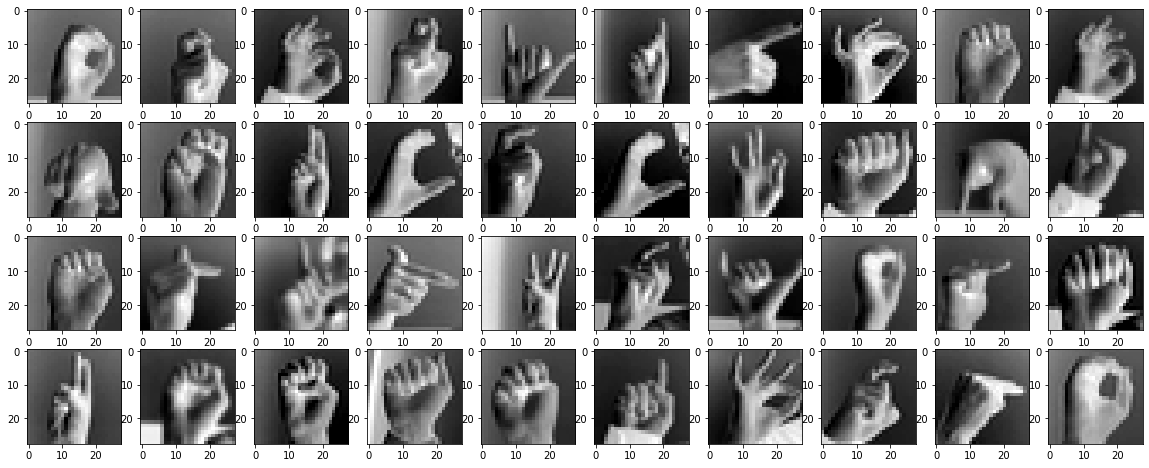

In [15]:
plt.figure(figsize=(20, 8))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray_r')
plt.show()

In [16]:
"""data generator to randomly implement changes to the data, increasing the amount of training examples and 
making the images more realistic by adding noise and transformations to different instances."""
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [17]:
import tensorflow as tf
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [18]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))

model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

2023-05-06 10:52:29.768864: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-06 10:52:29.768899: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-06 10:52:29.768930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (AiUbu): /proc/driver/nvidia/version does not exist
2023-05-06 10:52:29.866825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


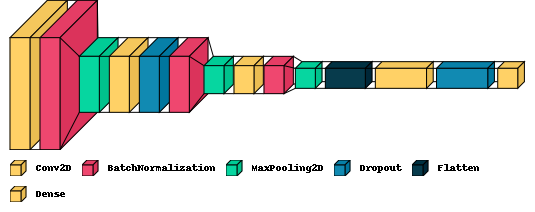

In [19]:
import visualkeras
visualkeras.layered_view(model, legend = True)

In [20]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [21]:
hist= model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data = (x_test,y_test), callbacks = [learning_rate_reduction])

Epoch 1/10
204/204 [==============================] - 128s 588ms/step - loss: 1.1599 - accuracy: 0.6364 - val_loss: 4.1667 - val_accuracy: 0.0759 - lr: 0.0010
Epoch 2/10
204/204 [==============================] - 184s 901ms/step - loss: 0.2661 - accuracy: 0.9132 - val_loss: 1.5195 - val_accuracy: 0.4881 - lr: 0.0010
Epoch 3/10
204/204 [==============================] - 166s 813ms/step - loss: 0.1316 - accuracy: 0.9573 - val_loss: 0.1687 - val_accuracy: 0.9502 - lr: 0.0010
Epoch 4/10
204/204 [==============================] - 108s 527ms/step - loss: 0.0727 - accuracy: 0.9763 - val_loss: 0.0213 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 5/10
204/204 [==============================] - 105s 514ms/step - loss: 0.0532 - accuracy: 0.9829 - val_loss: 0.1095 - val_accuracy: 0.9622 - lr: 0.0010
Epoch 6/10
204/204 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9862
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
204/204 [========================

In [22]:
model.save('smnist.h5')

In [23]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 6s 27ms/step - loss: 0.0043 - accuracy: 0.9996
Accuracy of the model is -  99.95816946029663 %


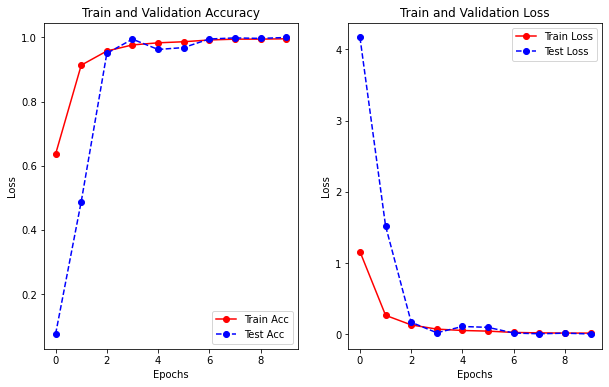

In [24]:
epochs = [i for i in range(10)]

fig,ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
vall_acc= hist.history['val_accuracy']
vall_loss=hist.history['val_loss']
fig.set_size_inches(10,6)

ax[0].plot(epochs, train_acc, color = 'red', marker = 'o', linestyle = '-', label='Train Acc')
ax[0].plot(epochs, vall_acc, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, train_loss, color = 'red', marker = 'o', linestyle = '-', label='Train Loss')
ax[1].plot(epochs, vall_loss, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import cv2
import mediapipe as mp
from keras.models import load_model
import time

In [26]:
model = load_model('smnist.h5')

mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
_, frame = cap.read()
h, w, c = frame.shape

analysisframe = ''
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [27]:
while True:
    _, frame = cap.read()

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break

    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks
    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)
    cv2.imshow("Frame", frame)

cap.release()
cv2.destroyAllWindows()

Escape hit, closing...


In [28]:
while True:
    _, frame = cap.read()
    
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        # SPACE pressed
        analysisframe = frame
        showframe = analysisframe
        cv2.imshow("Frame", showframe)
        framergbanalysis = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2RGB)
        resultanalysis = hands.process(framergbanalysis)
        hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
        if hand_landmarksanalysis:
            for handLMsanalysis in hand_landmarksanalysis:
                x_max = 0
                y_max = 0
                x_min = w
                y_min = h
                for lmanalysis in handLMsanalysis.landmark:
                    x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y
                y_min -= 20
                y_max += 20
                x_min -= 20
                x_max += 20 

        analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
        analysisframe = analysisframe[y_min:y_max, x_min:x_max]
        analysisframe = cv2.resize(analysisframe,(28,28))


        nlist = []
        rows,cols = analysisframe.shape
        for i in range(rows):
            for j in range(cols):
                k = analysisframe[i,j]
                nlist.append(k)
        
        datan = pd.DataFrame(nlist).T
        colname = []
        for val in range(784):
            colname.append(val)
        datan.columns = colname

        pixeldata = datan.values
        pixeldata = pixeldata / 255
        pixeldata = pixeldata.reshape(-1,28,28,1)
prediction = model.predict(pixeldata)
predarray = np.array(prediction[0])
letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
predarrayordered = sorted(predarray, reverse=True)
high1 = predarrayordered[0]
high2 = predarrayordered[1]
high3 = predarrayordered[2]
for key,value in letter_prediction_dict.items():
    if value==high1:
        print("Predicted Character 1: ", key)
        print('Confidence 1: ', 100*value)
    elif value==high2:
        print("Predicted Character 2: ", key)
        print('Confidence 2: ', 100*value)
    elif value==high3:
        print("Predicted Character 3: ", key)
        print('Confidence 3: ', 100*value)
time.sleep(5)